# Проверка гипотез для увеличения выручки интернет-магазина

## Библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

## Приоритизация гипотез

Сохраним данные в переменную hypothesis и посмотрим на них.

In [2]:
hypothesis = pd.read_csv(r'D:\Analysis\repository_prakticum\hypothesis.csv')

In [3]:
pd.options.display.max_colwidth = 110
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


*Комментарий.* Всего для рассмотрения представлено 9 гипотез. Оценены для них параметры Reach, Impact, Confidence, Efforts. Этих данных достаточно для приоритизации гипотез способом ICE или RICE. 

### Фреймворк ICE

Рассчитаем ICE для гипотез (добавим соответствующий столбец) и отсортируем по убыванию при выведении.

In [4]:
hypothesis['ICE'] = hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


*Комментарий.* Наиболее перспективные гипотезы по ICE: 8, 0, 7. Также высоким приоритетом обладают гипотезы 6 и 2.

### Фреймворк RICE

Добавим столбец с результатом рассчета RICE и отсортируем по его убыванию при выводе.

In [5]:
hypothesis['RICE'] = hypothesis.iloc[:, 1:3].prod(axis=1)/hypothesis['Efforts']
hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",14.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",5.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",3.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",2.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1.8
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",1.0


*Комментарий.* Наиболее перспективная гипотеза по RICE: 7. Также высоким приоритетом обладает гипотеза 2. Далее идут 0 и 6. Гипотеза 8 находится на 8 месте.

### Вывод 

Список гипотез:
- 0	- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
- 1 - Запустить собственную службу доставки, что сократит срок доставки заказов.
- 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.
- 3 - Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар.
- 4 - Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей.
- 5 - Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов.
- 6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.
- 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
- 8 - Запустить акцию, дающую скидку на товар в день рождения.


Наиболее перспективные гипотезы по **ICE**:
<br>1) 8 - Запустить акцию дающую скидку на товар в день рождения.
<br>2) 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
<br>3) 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
<br>Также высоким приоритетом обладают гипотезы 6 и 2.


Наиболее перспективная гипотеза по **RICE** с большим отрывом - 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. Также высоким приоритетом обладает гипотеза 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа. Далее идут 0 и 6. Гипотеза 8 находится на 8 месте.

В отличие от RICE **критерий ICE не учитывает количество пользователей, которых затронут изменения**. Гипотеза 8 затрагивает небольшое количество пользователей, поэтому переместилась с первой позиции по критерию ICE на предпоследнюю 8-ую по критерию RICE.

## Анализ А/В-теста

Загрузим результаты А/В-тестов orders и visitors. Столбцы с датами преобразуем в соответствующий вид сразу при выгрузке.<br>Посмотрим информацию о представленных данных и первые строки таблиц.

In [6]:
orders = pd.read_csv(r'D:\Analysis\repository_prakticum\orders.csv', parse_dates=['date'])
visitors = pd.read_csv(r'D:\Analysis\repository_prakticum\visitors.csv', parse_dates=['date'])

In [7]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [9]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [10]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


*Комментарий.* 
- Типы данных соотвествуют представленным в таблицах.
- Судя по количеству данных, приведенных в ячейках, пропусков нет.

Можно приступать к анализу.

### Кумулятивные данные

Чтобы исключить проблему подсматривания, проанализируем графики накапливаемых данных. Для этого создадим датафрейм с кумулятивными выручкой, количеством заказов и количеством посетителей сайта:
- Выделим уникальные даты, за которые есть данных по группам.
- Определим кумулятивную переменную, в которой рассчитаем суммарную накопленную выручку на каждый день теста, отсортируем по дате и группе
- Определим кумулятивную переменную, в которой рассчитаем суммарное накопленное за каждый день теста число посетителей, отсортируем по дате и группе.
- Объединим в один датафрейм кумулятивную информацию о покупках и посетителях.
- Дадим столбцам подходящие названия. 

In [11]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


#### Выручка по группам

Изучим кумулятивную выручку по дням в группе А и группе В отдельно. Для этого создадим 2 соответсвующих датафрейма и построим график изменений выручки для группы А и группы В.

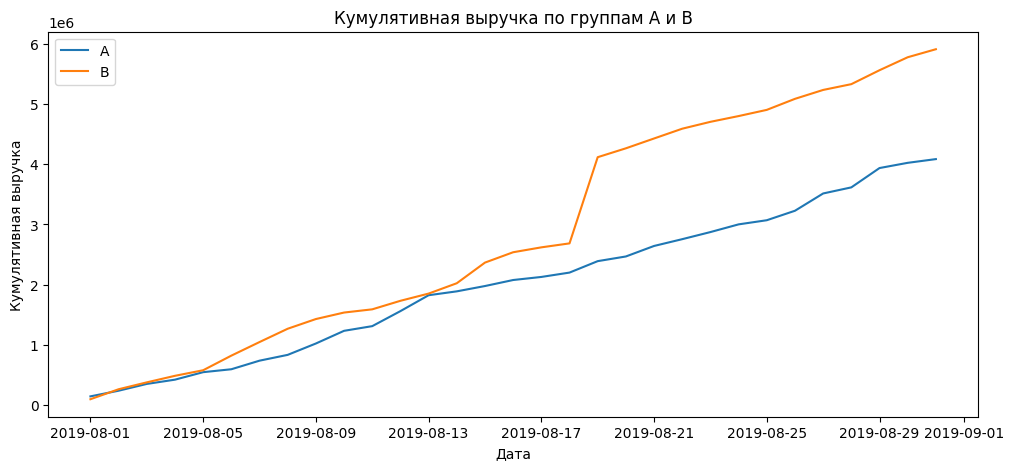

In [12]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.title('Кумулятивная выручка по группам А и В')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка');

**Вывод:** Выручка равномерно увеличивается в течение почти всего теста. За весь период теста сегмент А был ниже сегмента В, за исключнием нескольких значений в самом начале теста. В середине теста сегмент B резко вырос и продолжал лидировать весь остаток теста. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке, которые влияют на результат.

#### Средний чек

Добавим в cumulativeData (п. 1.2.1) столбец с данными о средних чеках: разделим выручку на количество посетителей сайта.

In [13]:
cumulativeData['avg_bill'] = cumulativeData['revenue']/cumulativeData['visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors,avg_bill
0,2019-08-01,A,24,20,148579,719,206.646732
1,2019-08-01,B,21,20,101217,713,141.959327
2,2019-08-02,A,44,38,242401,1338,181.166667
3,2019-08-02,B,45,43,266748,1294,206.142195
4,2019-08-03,A,68,62,354874,1845,192.343631


##### Средний чек по группам

Изучим кумулятивный средний чек по дням в группе А и группе В отдельно. Для этого создадим 2 соответсвующих датафрейма и построим график изменений среднего чека для группы А и группы В.

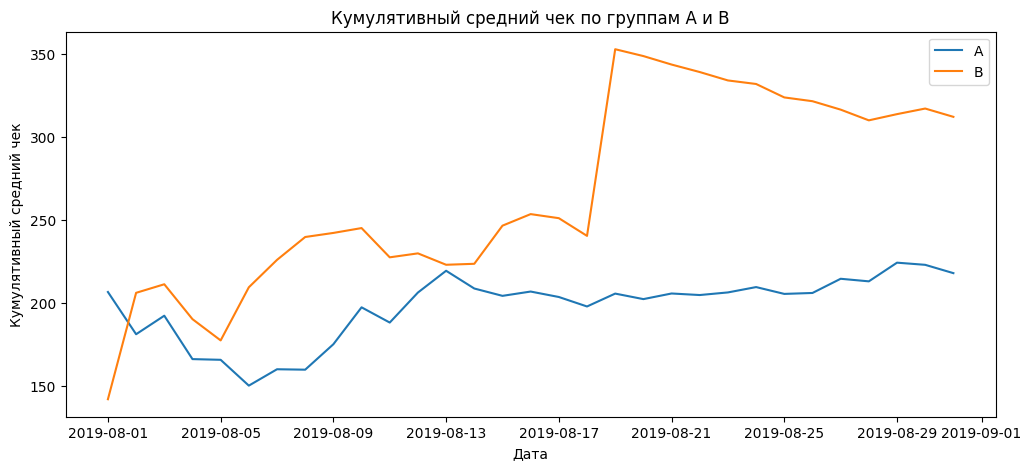

In [14]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(12,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['avg_bill'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['avg_bill'], label='B')

plt.legend()
plt.title('Кумулятивный средний чек по группам А и В')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек');

**Вывод:**  Средний чек становится равномерным ближе к концу теста: установился для группы A и продолжает падать или установился для группы B. В середине теста в группу В могли попасть крупные заказы - резкий всплеск на графике. При этом группа B стабильно лучше по накопленным показателям, чем группа A.

##### Относительное изменение кумулятивного среднего чека

Посмотрим как изменялся кумулятивный средний чек группы В относитеьно группы А. Прирост рассчитаем как: средний чек В/средний чек А - 1. Для этого объединим данные о среднем чеке для каждой группы по датам. 

In [15]:
mergedCumulativeBill = (
    cumulativeDataA[['date','avg_bill']]
    .merge(cumulativeDataB[['date','avg_bill']],
           left_on='date', right_on='date', 
           how='left', suffixes=['_A', '_B'])
)
mergedCumulativeBill.head()

,date,avg_bill_A,avg_bill_B
0,2019-08-01,206.646732,141.959327
1,2019-08-02,181.166667,206.142195
2,2019-08-03,192.343631,211.312257
3,2019-08-04,166.158860,190.270890
4,2019-08-05,165.737492,177.437500


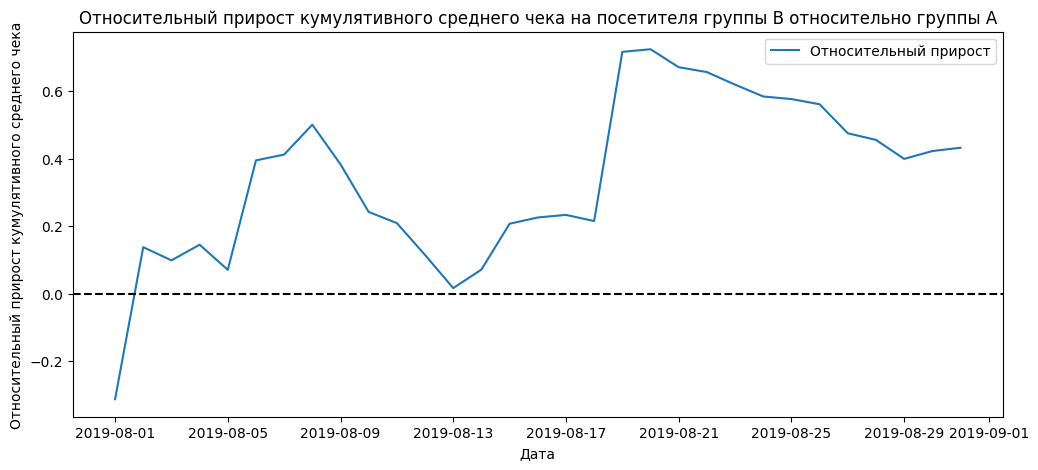

In [16]:
plt.figure(figsize=(12,5))

plt.plot(mergedCumulativeBill['date'], 
         mergedCumulativeBill['avg_bill_B']/mergedCumulativeBill['avg_bill_A']-1, 
         label='Относительный прирост')

plt.legend()
plt.title('Относительный прирост кумулятивного среднего чека на посетителя группы B относительно группы A')
plt.xlabel('Дата')
plt.ylabel('Относительный прирост кумулятивного среднего чека')
plt.axhline(y=0, color='black', linestyle='--');

**Вывод:** Группа B стабильно лучше группы A по среднему чеку. Различие не стабильно во времени, но в целом увеличивается. На конец теста показатели группы В превышали средний чек группы А более чем на 40%. В нескольких точках график различия между сегментами резко «скачет». Это может указывать на крупные заказы и выбросы, влияющие на результат.

#### Среднее количество заказов на посетителя

Добавим в существующий датафрейм конверсию посетителей сайта в покупателей.

In [17]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors,avg_bill,conversion
0,2019-08-01,A,24,20,148579,719,206.646732,0.033380
1,2019-08-01,B,21,20,101217,713,141.959327,0.029453
2,2019-08-02,A,44,38,242401,1338,181.166667,0.032885
3,2019-08-02,B,45,43,266748,1294,206.142195,0.034776
4,2019-08-03,A,68,62,354874,1845,192.343631,0.036856


##### Cреднее количество заказов

Изучим кумулятивное среднее количество заказов на посетителя сайта по дням в группе А и группе В отдельно. Для этого создадим 2 соответствующих датафрейма и построим график изменений конверсии для группы А и группы В.

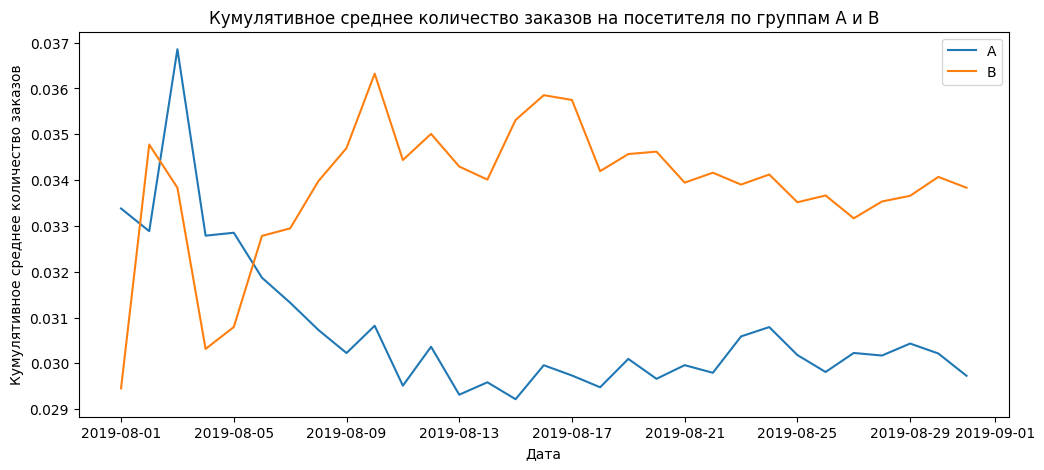

In [18]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(12,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.legend()
plt.title('Кумулятивное среднее количество заказов на посетителя по группам А и В')
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее количество заказов');

**Вывод:** В начале теста группа В была значительно ниже группы А, однако билже к середине группа B стала стабильно лучше группы А по среднему количеству заказов на посетителя. В начале теста были колебания конверсии в обеих группах. График стабилизировался ближе к середине теста, значения обеих групп зафиксировались. 

##### Относительное изменение кумулятивного среднего количества заказов

Посмотрим как изменялось кумулятивное среднее количество заказов на посетителя группы А от кумулятивного среднего количества заказов на посетителя группы В (рассчитаем аналогично относительному изменению среднего чека). Для этого объединим данные о среднем количестве заказов для каждой группы по датам. 

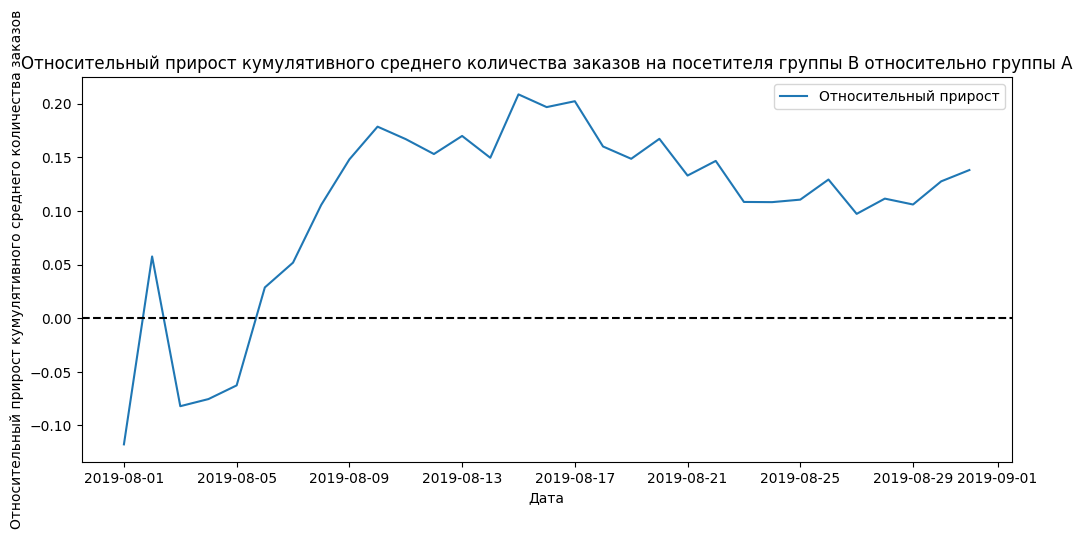

In [19]:
# Получим необходимый датафрейм.
mergedCumulativeConversions = (
    cumulativeDataA[['date','conversion']]
    .merge(cumulativeDataB[['date','conversion']], 
           left_on='date', right_on='date', 
           how='left', suffixes=['A', 'B'])
)

plt.figure(figsize=(12,5))
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label='Относительный прирост')

plt.legend()
plt.title('Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A')
plt.xlabel('Дата')
plt.ylabel('Относительный прирост кумулятивного среднего количества заказов')
plt.axhline(y=0, color='black', linestyle='--');

**Вывод:** В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. С середины теста среднее количество заказов на посетителя для группы B начало уменьшаться, но теперь постепенно растёт или стабилизировалось на уровне порядка +15%.

#### Вывод

В целом с середины теста показатели группы В стабильно лучше показателей группы А. Однако делать какие-либо выводы рано. Ход кривых группы В указывает на наличие аномально больших заказов в середине теста. Их исключение может привести к другому результату.

### Анализ выбросов и всплесков

Для исключения влияния аномальных данных на результаты теста, проведем их анализ.

#### Количество заказов по пользователям

Оценку аномалий проведем следующим образом:
- Оценим визуально: построим график распределения количества заказов на пользователя. Ось Х зададим как серию из ччисел от 0 до количества наблюдейний в соответствующем датафрейме (ordersByUsers).
- Оценим количественно: рассчитаем 95 и 99 процентиль количества заказов на пользователя.

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


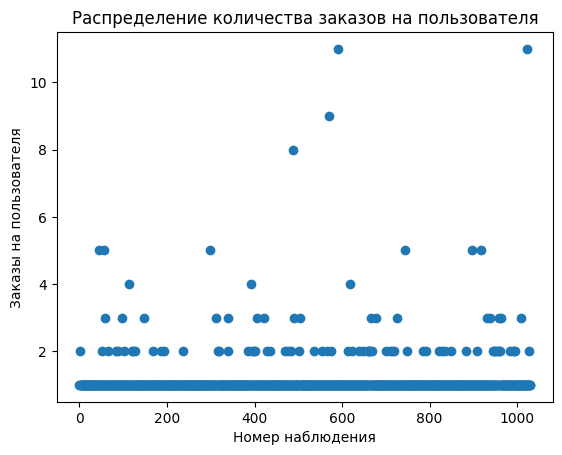

In [20]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])

plt.title('Распределение количества заказов на пользователя')
plt.xlabel('Номер наблюдения')
plt.ylabel('Заказы на пользователя');

In [21]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

**Выводы:**
- На графике присутствуют выбивающиеся из общей картины очень большие заказы. Чтобы исключить их, графически количество заказов можно ограничить 4-5.
- 99% всех заказов были сделаны в количестве до 4 включительно. Отсеим 1% данных, для которых число заказов на человека > 4.

#### Стоимости заказов

Аналогично проведем оценку аномалий стоимости заказов:
- Оценим визуально: построим график распределения выручки.
- Оценим количественно: рассчитаем 95 и 99 процентиль выручки.

      transactionId   visitorId       date  revenue group
425       590470918  1920142716 2019-08-19  1294500     B
1196     3936777065  2108080724 2019-08-15   202740     B
858       192721366  1316129916 2019-08-27    93940     A
1136      666610489  1307669133 2019-08-13    92550     A
744      3668308183   888512513 2019-08-27    86620     B
682      1216533772  4266935830 2019-08-29    78990     B
662      1811671147  4266935830 2019-08-29    78990     A
743      3603576309  4133034833 2019-08-09    67990     A
1103     1348774318  1164614297 2019-08-12    66350     A
1099      316924019   148427295 2019-08-12    65710     A


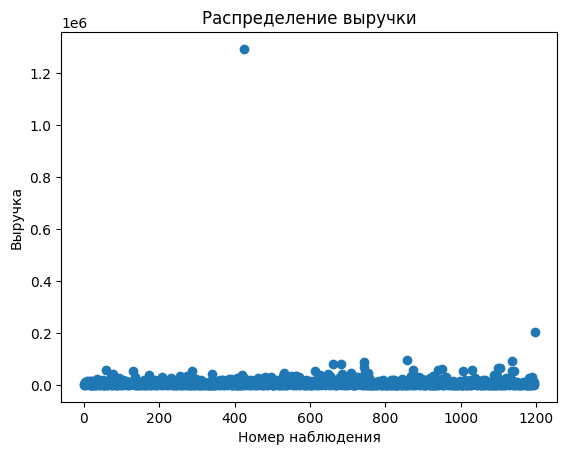

In [22]:
print(orders.sort_values(by='revenue', ascending=False).head(10))

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

plt.title('Распределение выручки')
plt.xlabel('Номер наблюдения')
plt.ylabel('Выручка');

Посмотрим на график поближе: построим его без сильно выбивающихся значений выручки, ограничив выручку 200000.

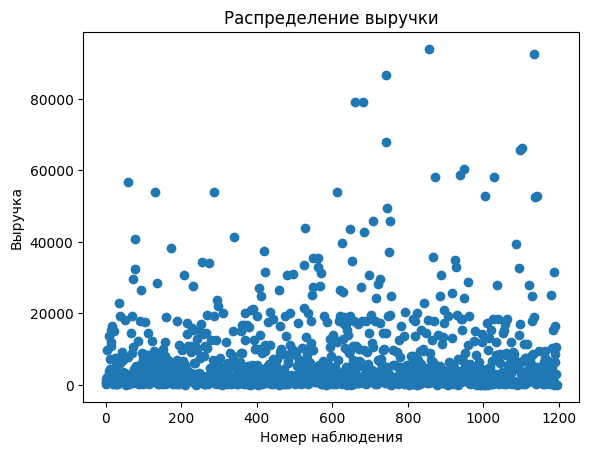

In [23]:
x_values = pd.Series(range(0, len(orders.query('revenue < 200000')['revenue'])))
plt.scatter(x_values, orders.query('revenue < 200000')['revenue'])

plt.title('Распределение выручки')
plt.xlabel('Номер наблюдения')
plt.ylabel('Выручка');

In [24]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

**Вывод:**
- На графике стоимости заказов присутвует 2 явно огромных выброса, которые наверняка вносят сильные искажения в результаты теста. Также присутсвуют и не такие большие всплески от 40000 до 100000, однако и они не отражают поведение "среднего" посетителя. Видно, что основная масса заказов находится по стоимости ниже 20000.
- Стоимость 95% всех заказов находится ниже 28000, стоимость заказов лишь 1% превышает 58233,2. Отсеим 5% аномально дорогих заказов, оставив в данных информацию только о тех, сумма которых не превышает 28000.

#### Статистическая значимость различий по "сырым" данным

Оценим насколько случайными является равенство или различие в средних значениях по "сырым" неочищенным от выбросов данным:
- Соберем необходимые данные в 2 датафрейма с информацией о группе А и информацией о группе В.
- Для расчета статистической значимости различий в средних показателях используем тест Уилкоксона-Манна-Уитни (критерий mannwhitneyu()). Установим уровень статистической значимости аlpha=0,05.

In [25]:
# Выделим количество посетителей в каждый день теста для группы А.
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsACummulative.head()

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [26]:
# Выделим количество посетителей в каждый день теста для группы В.
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

visitorsBCummulative.head()

,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


In [27]:
# Выделим выручку в каждый день теста для группы А.
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersACummulative.head()

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917


In [28]:
# Выделим выручку в каждый день теста для группы В.
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

ordersBCummulative.head()

,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,21,101217
1,2019-08-02,45,266748
2,2019-08-03,61,380996
3,2019-08-04,78,489567
4,2019-08-05,101,581995


In [29]:
# Соберем все данные в одну таблицу data.
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


###### Cреднее количество заказов на посетителя между группами

Рассмотрим статистическую значимость в различиях среднего количества заказов на посетителя по группам по "сырым" данным, используя критерий mannwhitneyu().
<br>Проверим гипотезу:
- *Нулевая гипотеза:* различий в среднем количестве заказов на посетителя между группами нет.
- *Альтернативная гипотеза:* различия в среднем количестве заказов на посетителя между группами есть. 

In [30]:
# Из таблицы orders выделим количечство заказов на посетителя для группы А.
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']
ordersByUsersA.head()

,visitorId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [31]:
# Из таблицы orders выделим количечство заказов на посетителя для группы В.
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']
ordersByUsersB.head()

,visitorId,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


In [32]:
# Определим выборку группы А sampleA, где каждый элемент 
# — число заказов определённого пользователя. 
sampleA = pd.concat([ordersByUsersA['orders'],
                    pd.Series(0, index=np.arange(data['visitorsPerDateA']
                    .sum() - len(ordersByUsersA['orders'])), 
                    name='orders')],axis=0)

# Определим выборку группы B sampleB, где каждый элемент 
# — число заказов определённого пользователя. 
sampleB = pd.concat([ordersByUsersB['orders'],
                    pd.Series(0, index=np.arange(data['visitorsPerDateB']
                    .sum() - len(ordersByUsersB['orders'])), 
                    name='orders')],axis=0)

In [33]:
# Проведем тест.
alpha = 0.05
res_mw1 = st.mannwhitneyu(sampleA, sampleB)

if res_mw1.pvalue < alpha:
    print(f'P-value ({res_mw1.pvalue:.3f}) ниже критического уровня статистической значимости.\
    \nОтвергаем нулевую гипотезу: разница статистически значима.')
else:
    print(f'P-value ({res_mw1.pvalue:.3f}) выше критического уровня статистической значимости.\
    \nНе получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя.')

print('Среднее значение для группы В на', '{0:.1%}'.format(sampleB.mean() / sampleA.mean() - 1),
'отличается от среднего группы А.')

P-value (0.017) ниже критического уровня статистической значимости.    
Отвергаем нулевую гипотезу: разница статистически значима.
Среднее значение для группы В на 13.8% отличается от среднего группы А.


**Вывод:** 
- По «сырым» данным различия в среднем числе заказов на посетителя есть: p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем.
- Группа В по среднему числу заказов на посетителя превосходит группу А на 13,8%.

##### Средний чек заказа

Рассмотрим статистическую значимость в различиях среднего чека заказа по группам по "сырым" данным.
<br>Проверим гипотезу:
- *Нулевая гипотеза:* различий в среднем чеке между группами нет.
- *Альтернативная гипотеза:* различия в среднем чеке между группами есть.

Определим выборку группы А и группы В, проведем тест.

In [34]:
sampleA_bill = orders[orders['group']=='A']['revenue']
sampleB_bill = orders[orders['group']=='B']['revenue']

alpha = 0.05
res_mw2 = st.mannwhitneyu(sampleA_bill, sampleB_bill)

if res_mw2.pvalue < alpha:
    print(f'P-value ({res_mw2.pvalue:.3f}) ниже критического уровня статистической значимости.\
    \nОтвергаем нулевую гипотезу: разница статистически значима.')
else:
    print(f'P-value ({res_mw2.pvalue:.3f}) выше критического уровня статистической значимости.\
    \nНе получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя.')

print('Среднее значение для группы В на', '{0:.1%}'.format(sampleB_bill.mean() / sampleA_bill.mean() - 1),
'отличается от среднего группы А.')

P-value (0.729) выше критического уровня статистической значимости.    
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя.
Среднее значение для группы В на 25.9% отличается от среднего группы А.


**Вывод:** P-value (0.729) значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше (на 25,9%) среднего чека группы A.

#### Вывод

По "сырым" данным:
- Различия в среднем числе заказов на посетителя между группами А и В *есть*.
- *Нельзя утверждать*, что есть различия в среднем чеке на посетителя между группами А и В.

В данных присутствуют аномально большие значения количества заказов на посетителя и стоимости заказов. В дальнейшем для исключения их влияния на результаты, выборки следует ограничить:
- количество заказов не более 4, что отсеит 1% данных;
- средний чек не более 28000, что отсеит 5% данных.

### Оценка результатов А/В теста

Очистим данные от выбросов и проведем еще один непараметрический тест Уилкоксона-Манна-Уитни для среднего количества заказов и среднего чека на посетителя среди групп А и В. Установим уровень статистической значимости аlpha=0,05.

Примем за аномальных посетителей сайта:
- тех, чья сумма заказа превышает 28000;
- тех, кто сделал более 4 заказов.

Сделаем соответствующие срезы. Запишем в переменные usersWithManyOrders и usersWithExpensiveOrders "аномальных" пользователей. Объединим и, удалив дублирующие строки, применим сортировку.

In [35]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(abnormalUsers.head(5))
print('\nВсего', abnormalUsers.shape[0], '"аномальных" пользователей')

1099    148427295
928     204675465
684     358944393
648     382846391
1189    393266494
Name: visitorId, dtype: int64

Всего 59 "аномальных" пользователей


#### Статистическая значимость различий по "очищенным данным"

##### Среднее количество заказов на посетителя

Рассмотрим статистическую значимость в различиях среднего количества заказов на посетителя по группам по "очищенным" данным.
<br>Проверим гипотезу:
- *Нулевая гипотеза:* различий в среднем количестве заказов на посетителя между группами нет.
- *Альтернативная гипотеза:* различия в среднем количестве заказов на посетителя между группами есть.

Определим выборку группы А и группы В, проведем тест.

In [36]:
sampleA_filtr = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
     pd.Series(0, index=np.arange(
         data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
               name='orders',),
    ], axis=0,
)

sampleB_filtr = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['visitorId']
                                   .isin(abnormalUsers))]['orders'],
        pd.Series(0, index=np.arange(
            data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
                  name='orders',),
    ], axis=0,
)

alpha = 0.05 
res_mw3 = st.mannwhitneyu(sampleA_filtr, sampleB_filtr)

if res_mw3.pvalue < alpha:
    print(f'P-value ({res_mw3.pvalue:.3f}) ниже критического уровня статистической значимости.\
    \nОтвергаем нулевую гипотезу: разница статистически значима.')
else:
    print(f'P-value ({res_mw3.pvalue:.3f}) выше критического уровня статистической значимости.\
    \nНе получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя.')

print('Среднее значение для группы В на', '{0:.1%}'.format(sampleB_filtr.mean() / sampleA_filtr.mean() - 1),
'отличается от среднего группы А.')

P-value (0.018) ниже критического уровня статистической значимости.    
Отвергаем нулевую гипотезу: разница статистически значима.
Среднее значение для группы В на 14.5% отличается от среднего группы А.


**Вывод:**
- По «очищенным» данным различия в среднем числе заказов на посетителя есть: p-value = 0.018 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем.
- Группа В по среднему числу заказов на посетителя превосходит группу А на 14,5%.

##### Средний чек заказа

Рассмотрим статистическую значимость в различиях среднего чека заказа по группам по "очищенным" данным.
<br>Проверим гипотезу:
- *Нулевая гипотеза:* различий в среднем чеке между группами нет.
- *Альтернативная гипотеза:* различия в среднем чеке между группами есть.

Определим выборку группы А и группы В, проведем тест.

In [37]:
sampleA_bill_filtr = orders[np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId']
                                   .isin(abnormalUsers)),)]['revenue']
                   
        
sampleB_bill_filtr = orders[np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId']
                                   .isin(abnormalUsers)),)]['revenue']

alpha = 0.05
res_mw4 = st.mannwhitneyu(sampleA_bill_filtr, sampleB_bill_filtr)

if res_mw4.pvalue < alpha:
    print(f'P-value ({res_mw4.pvalue:.3f}) ниже критического уровня статистической значимости.\
    \nОтвергаем нулевую гипотезу: разница статистически значима.')
else:
    print(f'P-value ({res_mw4.pvalue:.3f}) выше критического уровня статистической значимости.\
    \nНе получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя.')

print('Среднее значение для группы В на', 
      '{0:.1%}'.format(sampleB_bill_filtr.mean() / sampleA_bill_filtr.mean() - 1),
      'отличается от среднего группы А.')

P-value (0.961) выше критического уровня статистической значимости.    
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя.
Среднее значение для группы В на -1.4% отличается от среднего группы А.


**Вывод:** P-value (0.961) значительно больше 0.05 и увеличился по сравнению с "сырыми" данными. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, по-прежнему нет. Однако в этом случае средний чек группы B ниже среднего чека группы A на 1,4% против увеличния на 25,9% для "сырых" данных.

#### Вывод

По "очищенным" данным:
- Различия в среднем числе заказов на посетителя между группами А и В *есть*. Изменения по сравнению с результатом теста для "сырых" данных незначительны.
- *Нельзя утверждать*, что есть различия в среднем чеке на посетителя между группами А и В. После фильтрации аномально высокой стоимости заказов результат теста не изменился, однако увеличился p-value и сократилась разница между сегментами с +25,9% до -1,4% для группы В.

### Вывод - решение по результатам A/B-теста

Установленные в ходе анализа результатов А/В-теста факты:
- Как по "сырым", так и по данным после фильтрации аномалий статистически значимое различие по среднему количеству заказов между группами есть. При этом группа В по среднему числу заказов на посетителя превосходит группу А примерно на 14%;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия среднего количества заказов между группами сообщает, что результаты группы В, стабильно лучше результатов ггруппы А, стабилизировались на уровне порядка 15%.
- График различия среднего чека говорит о том, что группа В стабильно лучше группы A по среднему чеку. Различие не стабильно во времени, но в целом увеличивается. На конец теста показатели группы В превышали средний чек группы А более чем на 40%.

Исходя из обнаруженных фактов, тест следует остановить и зафиксировать победу группы В. Продолжать смысла нет, потому как группа В по показателям значительно лучше группы А и результаты для обеих групп стабилизировались во времени.

## Общий вывод

*Задача.* Необходимо было приотизировать список выдвинутых гипотез для увеличения выручки крупного интернет-магазина, проанализировать результаты А/В-теста.

*Данные* представлены в трех таблицах hypothesis, orders и visitors.

1. Приоритизация гипотез была проведена по двум критериям ICE и RICE.
<br>Наиболее перспективные гипотезы по ICE: 1) 8 - Запустить акцию дающую скидку на товар в день рождения; 2) 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей; 3) 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. Также высоким приоритетом обладают гипотезы 6 и 2.
<br>Наиболее перспективная гипотеза по RICE с большим отрывом: 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. Также высоким приоритетом обладает гипотеза 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа. Далее идут 0 и 6. Гипотеза 8 находится на 8 месте.
<br>В отличие от RICE критерий ICE не учитывает количество пользователей, которых затронут изменения. Гипотеза 8 затрагивает небольшое количество пользователей, поэтому переместилась с первой позиции по критерию ICE на предпоследнюю 8-ую по критерию RICE.


2. Анализ A/B-теста включал в себя:
- Анализ кумулятивных выручки, среднего количества заказов на посетителя и среднего чека: <br>В целом с середины теста показатели группы В стабильно лучше показателей группы А. Однако делать какие-либо выводы рано. Ход кривых группы В указывает на наличие аномально больших заказов в середине теста. Их исключение может привести к другому результату.

- Анализ выбросов и всплесков:
<br>По "сырым" данным:
<br> - Различия в среднем числе заказов на посетителя между группами А и В *есть*.
<br> - *Нельзя утверждать*, что есть различия в среднем чеке на посетителя между группами А и В.
<br>В данных присутствуют аномально большие значения количества заказов на посетителя и стоимости заказов. В дальнейшем для исключения их влияния на результаты, выборки следует ограничить:
<br> - количество заказов не более 4, что отсеит 1% данных;
<br> - средний чек не более 28000, что отсеит 5% данных.

- Анализ результатов А/В-тестов по очищенным данным:
<br>Установленные в ходе анализа результатов А/В-теста факты:
<br> - Как по "сырым", так и по данным после фильтрации аномалий статистически значимое различие по среднему количеству заказов между группами есть. При этом группа В по среднему числу заказов на посетителя превосходит группу А примерно на 14%;
<br> - Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
<br> - График различия среднего количества заказов между группами сообщает, что результаты группы В, стабильно лучше результатов ггруппы А, стабилизировались на уровне порядка 15%.
<br> - График различия среднего чека говорит о том, что группа В стабильно лучше группы A по среднему чеку. Различие не стабильно во времени, но в целом увеличивается. На конец теста показатели группы В превышали средний чек группы А более чем на 40%.


**Исходя из проведенного анализа можно предложить:**
<br>остановить и зафиксировать победу группы В. Так как группа В по показателям значительно лучше группы А и результаты для обеих групп стабилизировались во времени.